In [3]:
%matplotlib inline
import numpy as np
import scipy.fftpack as fourier
from scipy.signal import find_peaks_cwt as findPeak
import matplotlib.pyplot as plt

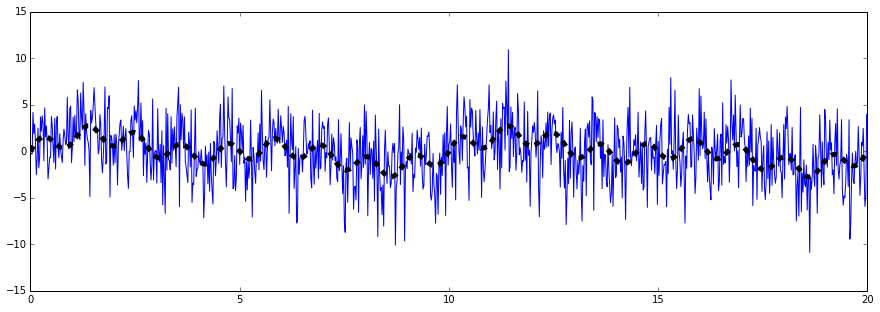

In [4]:
timeStep = 0.02
time = np.arange(0,20,timeStep)
freqs = [
    0.1,
    0.2,
    0.9
    ]
source = [np.sin(2*np.pi*freq*time) for freq in freqs] 
noise = 3.*np.random.randn(time.size)
# noise = 0
signal = sum(source) + noise
origSig = sum(source)

plt.figure(figsize=(15,5))
plt.plot(time,signal,color='blue')
plt.plot(time,origSig,color='black',ls='--',lw=5)
plt.show()

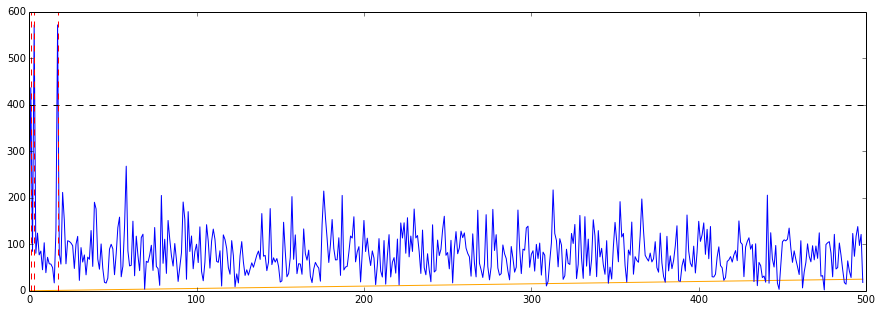

In [5]:
# Find sample frequency and fft
sigFreq = fourier.fftfreq(signal.size,d=timeStep)
sigFft = fourier.fft(signal)
threshold = 400.

# Signal is symmetric, look only in first half
symmInd = np.where(sigFreq>0)
symmFreq = sigFreq[symmInd]
symmFft = sigFft[symmInd]

# Scipy peak finder SUCKS! Use user-driven one
# peaks = findPeak(abs(symmFft),np.arange(0.5,1.5),min_snr=4)
def customPeakFinder(array,threshold):
    indColl = []
    for i,val in enumerate(array):
        if val > threshold:
            indColl.append(i)
    return indColl

peakInds = customPeakFinder(abs(symmFft),threshold)

plt.figure(figsize=(15,5))
plt.plot(symmFreq,color='orange')
plt.plot(abs(symmFft),color='blue')
plt.axhline(threshold,color='black',ls='--')
for peakInd in peakInds: plt.axvline(peakInd,color='red',ls='--')
plt.show()

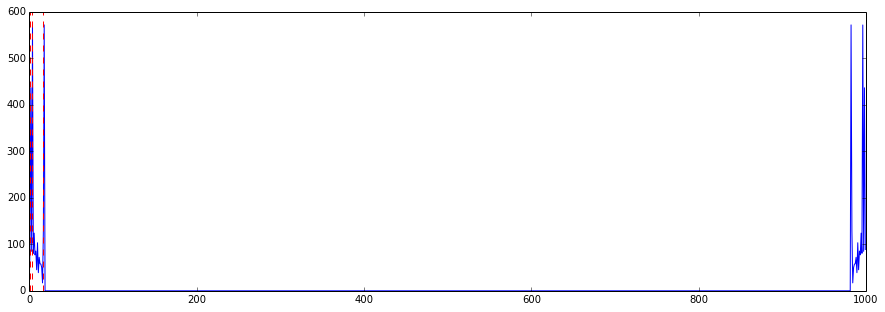

In [6]:
foundFreqs = []
for i,peakInd in enumerate(peakInds):
    foundFreqs.append(symmFreq[peakInd])

sigFft[np.abs(sigFreq) > max(foundFreqs)] = 0
plt.figure(figsize=(15,5))
plt.plot(abs(sigFft),color='blue')
for peakInd in peakInds: plt.axvline(peakInd,color='red',ls='--')
plt.show()

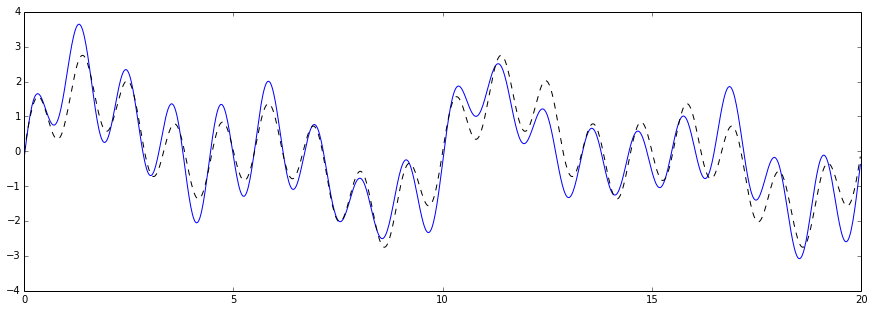

In [8]:
foundSig = fourier.ifft(sigFft)
plt.figure(figsize=(15,5))
plt.plot(time,foundSig,color='blue')
plt.plot(time,origSig,color='black',ls='--')
plt.show()